# Uso de Python para resolver problemas algebraicos.

Usamos la librería sympy. Si aún no está instalado, podemos instalarla abriendo una terminal y usando el comando:

    conda install sympy

Para no contaminar nuestro espacio de trabajo con cuestiones no necesarias importamos la librería con un alias `sp`, así todas las funciones de esta librería estarán disponibles usando `sp.`

In [1]:
import sympy as sp

Y, para tener una salida gráfica de las expresiones matemáticas usamos:

In [2]:
sp.init_printing(use_unicode=True)

A continuación declaramos los símbolos que utilizaremos. Es necesario declarar todos los símbolos que utilizaremos del lado derecho de asignaciones.

In [3]:
x, C_1, C_2, Q, K, T_L, L, q = sp.symbols('x, C_1, C_2, Q, K, T_L, L, q')

__Nota__: Con las expresiones dentro de la función `symbols` podemos modificar como sympy representa las variables usando __LATEX__. Por ejemplo: `C_1` se convertirá en $C_1$.

Comenzamos por integrar la expresión:

$$\int \frac {d^2} {dx^2} T = - \frac {Q} {K} $$

Con respecto a $x$ y sumamos la constante de integración $C_1$.

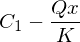

In [4]:
dT = sp.integrate(-(Q/K), x) + C_1
dT

Usando la condición de frontera conocida, para resolver las incógnitas del sistema colocamos toda la ecuación del mismo lado, obteniendo:

$$\frac {dT} {dx} \Big|_{x=0} + \frac {q} {K} = 0$$

$$C_1 - \frac {Qx}{K}\Big|_{x=0} + \frac {q} {K} = 0$$

Ahora, resolvemos las incógnitas del sistema substituyendo x=0.

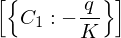

In [5]:
sp.solve(dT.subs(dict(x=0))+q/K)

Substituyendo el valor que obtuvimos para $C_1$:

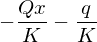

In [6]:
dT = dT.subs(dict(C_1=-q/K))
dT

Integramos una segunda vez, añadiendo la constante $C_2$:

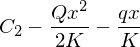

In [7]:
T = sp.integrate(dT, x) + C_2
T

Nuevamente colocamos toda la ecuación del mismo lado para resolver las incógnitas:

$$ T \, \big|_{x=L} - T_L = 0$$

$$ C_2 - \frac {Qx^2}{2K} - \frac {qx} {K} - TL = 0 $$

Y resolvemos las incógnitas del sistema substituyendo $x=T_L$.

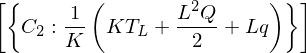

In [8]:
s = sp.solve((T.subs({x:L})-T_L))
s

Substituimos el valor obtenido en la ecuación:

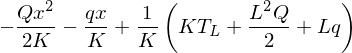

In [9]:
T = T.subs(s[0])
T

Hay varios métodos en simpy que nos pueden ayudar a simplificar los resultados:
* `factor()` va intentar sacar factores comunes.

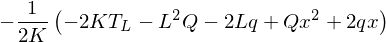

In [10]:
T.factor()

* `expand()` distribuye los factores para obtener una suma (o resta).

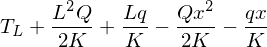

In [11]:
T.expand()